# !!!금리 인상시기에 가장 많이 오른 섹터/ 가장 많이 떨어진 섹터 찾기!!!

Recent Issue: 금리 인상 + 인플레이션
양적 완화 + 소비의 집중 -> 문을 닫았던 공장들에 과부화를 야기함

수요가 쏟아지니까 -> 원자재 값의 상승
#자산의 가격이 많이 올라감 -> 금리를 인상시켜서 시장의 유동성을 줄여야겠다는 이슈

Due to the COVID-19 effect to economy, passing 2 years after it, the world especially US is trying to increase interset rate.

Main reason is to prevent the inflation which raised to surface due to the surged needs for the products.

Korea, sensitive to US economy, had raised interest.

Through this proejct, I would like to sort out which industry had effected most or less from the interest raise.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
#-*-coding:utf-8-*-

df_10y_rate=pd.read_csv('D:\정유재\금융데이터 분석을 위한 판다스 활용법\자료\Data\Y RATE.csv',index_col='Date')
df_10y_rate_close=df_10y_rate[['Close']]
df_10y_rate_close=df_10y_rate_close.drop(df_10y_rate_close.index[df_10y_rate_close['Close'].argmin()]) #데이터에 0값이 포함되어 있어서 제거해줌
df_10y_rate_close_sample=df_10y_rate_close['2016-10-01':'2018-02-20'] #데이터를 보고 타겟하는 범위를 그래프를 보고 선택한다
df_10y_rate_close_sample 

분석할 ETF 섹터를 선택해보자

In [ ]:
krx_df=pd.read_csv('D:\정유재\금융데이터 분석을 위한 판다스 활용법\자료\Data\KRX.csv',encoding='cp949',index_col=0)
krx_df['Name'].values #KODEX ETF를 사용할 것 -> 이 종목들 중에서 KODEX 단어가 들어간 것들을 뽑아내야해

kodex_index=[]
krx_df.shape
for i in range(krx_df.shape[0]): #df.shape으로 보면 index가 7301개가 있어서
    if "KODEX" in krx_df['Name'].values[i]: # krx_df의 이름칼럼의 값들(value)에서 kodex가 있다면
        kodex_index.append(i) #그 정보들의 index를 리스트에 저장해라
kodex_etf_info=krx_df.iloc[kodex_index] #그 인덱스가 있는 줄만 모아놓은 df
kodex_etf_info

In [ ]:
#중요한 지표를 가지는 섹터 항목들을 선택

sector_list=['KODEX 200','KODEX IT','KODEX 건설','KODEX 게임산업','KODEX 경기소비재','KODEX 고배당','KODEX 골드선물(H)','KODEX 구리선물(H)','KODEX 기계장비','KODEX 바이오','KODEX 반도체','KODEX 보험','KODEX 에너지화학','KODEX 운송','KODEX 은행','KODEX 자동차','KODEX 증권','KODEX 철강','KODEX 필수소비재','KODEX 헬스케어']

kodex_etf_price_df=pd.read_csv('D:\정유재\금융데이터 분석을 위한 판다스 활용법\자료\Data\KODEX_ETF.csv',index_col=0)
kodex_etf_price_df
kodex_etf_info['Name'].isin(sector_list) #sector list 안에 있나 확인하는 방법


In [ ]:
kodex_sector_df=kodex_etf_price_df[sector_list] # sector list에 있는 것들의 정보만 들고온다 [] 안에는 칼럼 이름이 들어간다
kodex_sector_df.loc['2016-10-01':'2018-02-20'].isna().sum(axis=0) # 비교할 기간 안에 nan값이 존재하면 비교를 못한다. 이를 확인하는 작업
drop_list=['KODEX IT','KODEX 게임산업','KODEX 고배당','KODEX 필수소비재','KODEX 헬스케어','KODEX 경기소비재'] #nan값이 존재하는 데이터값들 버리기
kodex_sector_df=kodex_sector_df.drop(drop_list,axis=1) #열기준으로 없애주기니까 axis=1
kodex_sector_df


In [65]:
kodex_sector_df_sample=kodex_sector_df.loc['2016-10-01':'2018-02-20']

kodex_sector_df_sample.shape

(340, 14)

In [66]:
reindex_sample=df_10y_rate_close_sample.index.isin(kodex_sector_df_sample.index) #인덱스값이 달라서 조정이 필요해
df_10y_rate_close_resample=df_10y_rate_close_sample[reindex_sample]
df_10y_rate_close_resample.shape

(340, 1)

In [ ]:
df_10y_rate_close_resample.index==kodex_sector_df_sample.index #확인작업

In [ ]:
#새로운 데이터 프레임을 만든다

df=pd.DataFrame()

df['10Y Rate']=df_10y_rate_close_resample

for x in kodex_sector_df_sample.columns: #칼럼들의 이름에 쭉 있을 떄
    df[x]=kodex_sector_df_sample[x] #그 칼럼에 따른 정보들을 그 칼럼이름에 맞게 새로운 df에 넣는다

plt.plot(df)


In [100]:
#간단한 concat 함수로 구현해보기

#행의 값이 다를 때, 공통부분을 기준으로 합치는 방법
df1=pd.concat([df_10y_rate_close_sample,kodex_sector_df_sample],keys=['10Y','ETF'],axis=1,join='inner')

In [134]:
#그래프를 보니까 좌측 수치와 값들의 단위가 다르다 -> 손 볼 필요가 있어!

#금리부터 각 섹터 시작값을 같게 하기

df_set=df/df.iloc[0]*100 #초기값을 100으로 만들어보자. 0번 인덱스 기준으로 나눠주고 100을 곱해줘서 시작점을 맞춰주는 방법
# df_set.plot(figsize=(15,10)) #너무 값이 많고 어려워 그래프를 나눠보자!
df_set.columns


Index(['10Y Rate', 'KODEX 200', 'KODEX 건설', 'KODEX 골드선물(H)', 'KODEX 구리선물(H)',
       'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학',
       'KODEX 운송', 'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강'],
      dtype='object')

그래프를 그려보자

In [ ]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) #한글폰트 깨짐 해결방법!

fig, axes=plt.subplots(nrows=7,ncols=2,figsize=(25,40)) # 가로 2 세로 7 도화지 만들기

col_index=1 #10년 금리만 빼고 하나씩 더해가는

for col in range(2):
    for row in range(7):
        df_set['10Y Rate'].plot(ax=axes[row,col]) #()안의 좌표 각각에 10년 금리 그래프를 그릴거야
        df_set[df_set.columns[col_index]].plot(ax=axes[row,col]) #()안의 좌표 각각에 1,2,3~~ 증가하는 칼럼에 있는 정보들을 그릴거야
        col_index+=1 
        axes[row,col].legend(fontsize=20)
fig.suptitle('10년금리와 각 섹터 비교',fontsize=30)
plt.subplots_adjust(left=0.125,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.35) #제목과 그래프 사이의 간격이 멀어서 조절해주기
fig.tight_layout()

상관관계 구하자

<AxesSubplot:>

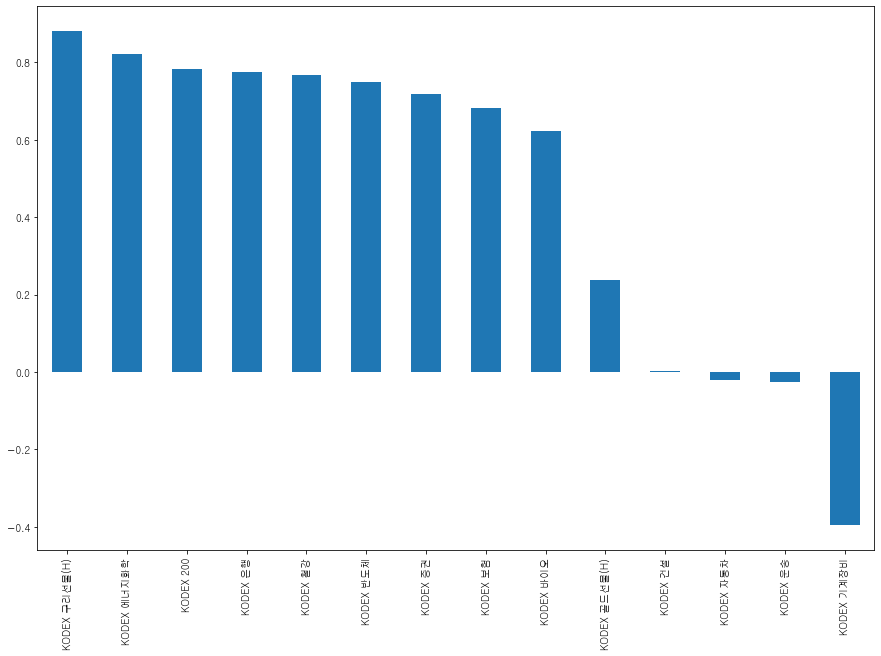

In [150]:
df_corr=df_set.corr()['10Y Rate'][1:].sort_values(ascending=False)

df_corr.plot.bar(figsize=(15,10))

In [ ]:
return_series=(df_set.iloc[df_set.shape[0]-1]-df_set.iloc[0])/df_set.iloc[0] #(df_set의 마지막 값- df_set의 첫번째 값)/ 첫번쨰 값
                                                                             #(shape하면 길이가 나오니까 -1 한것이 마지막 인덱스값)
return_series.sort_values(ascending=False)

In [ ]:
#질문: 금리인상 시기를 더 특정한, 더 컴펙트한 시기로 설정해 보고 싶다면?

return_series1=(df_set.loc['2016-12-13']-df_set.iloc[0])/df_set.iloc[0] #2016년 12월 13일까지도 오른 기간이니까, 그 기간의 수익률은?
return_series1.sort_values(ascending=False)

결론: 은행관련주가 가장 많이 올랐고/ 기계장비가 가장 많이 떨어졌다!

-> 데이터 기간과 어느 부분을 보냐에 따라 데이터의 결과도, 결론도 달라질 수 있다

-> 기초적인 pandas 문법과 데이터 분석하는 과정에 대해 배울 수 있어 좋았다